<a href="https://colab.research.google.com/github/mveer1/PythonNotes/blob/main/ML/ML01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01

In [ ]:
import keras
import numpy as np

In [ ]:
model =  keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])     #input shape is input shape, units=1 says 1 neuron. (this is the simplest nn)

In [ ]:
model.compile(optimizer = "sgd", loss = 'mean_squared_error')         #sgd is "something" gradient decent

In [ ]:
x = np.array([-1, 0, 1, 2, 3, 4, 5])
y = np.array([-3, -1, 1,3,5,7, 100])

model.fit(x, y, epochs = 500)  #fit the xs to the ys

In [ ]:
print(model.predict([10]))

[[109.87352]]


In [ ]:
#better
import tensorflow as tf
import numpy as np
from tensorflow import keras

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [ ]:
# houseprice = 5+5*num_beds
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape = [1])])
model.compile(optimizer="sgd", loss="mean_squared_error")

In [ ]:
num_beds = [0, 1, 2, 3, 4, 5, 6]
priceOfHouse = [5, 10, 15, 20, 25, 30, 35]
model.fit(num_beds, priceOfHouse, epochs=1000)

In [ ]:
print(model.predict([7]))

[[40.00683]]


# **Computer Vision: ML02**
[Lab 2](https://bit.ly/tfw-lab2cv)
[Exercise](https://bit.ly/tfw-lab2cvq)

We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset here.

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples [here](https://github.com/zalandoresearch/fashion-mnist):

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                  #flatten out the data 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),       #128 neurons, relu is just if negative then make it 0, if not keep it as it is
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])     # 10 neurons, softmax just takes the highest, sets it to 1, sets the rest to 0

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten:** Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense:** Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5005 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8910


In [ ]:
#now check the accuracy of our data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3484 - accuracy: 0.8770


[0.34840527176856995, 0.8769999742507935]

## Exercize one

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[3.8736994e-06 3.3199785e-07 7.9913416e-06 2.1873318e-06 1.8163082e-05
 3.0288224e-03 6.4812550e-05 3.8361523e-02 1.6128304e-05 9.5849615e-01]


In [ ]:
print(test_labels[0])

9


What does this list represent?
- It's 10 random meaningless values
- It's the first 10 classifications that the computer made
- It's the probability that this item is each of the 10 classes

Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

How do you know that this list tells you that the item is an ankle boot?
There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list

Answer: 
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

## Exercise 2

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4716
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3203
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2949
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3484
[7.0544244e-11 1.0401530e-10 3.9558093e-10 2.3389699e-10 6.6035649e-10
 2.5425118e-04 2.1789541e-10 3.0500095e-03 5.6986804e-10 9.9669576e-01]
9


Question 1. Increase to 1024 Neurons -- What's the impact?
- Training takes longer, but is more accurate
- Training takes longer, but no impact on accuracy
- Training takes the same time, but is more accurate
> Answer: The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

## Exercise 3:
> What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

## Exercise 4:
> Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5303
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4007
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3614
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3723
[1.1242286e-06 9.4570174e-09 1.9817921e-07 3.4006052e-06 1.2278613e-06
 5.6754541e-02 2.7165239e-05 5.9124149e-02 3.9830217e-03 8.8010520e-01]
9


## Exercise 6:
> Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

## Exercise 5:
> Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

## Exercise 7:
> Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

## Exercise 8:
> Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

## Exercise ML02
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

* It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
* When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
*If you add any additional variables, make sure you use the same names as the ones used in the class

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so cancelling training!!" %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


callbacks = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks= [callbacks])

model.evaluate(x_test, y_test)

# **ML03: Convolutions and pooling**

> e.g. Extracting features from a image and processing the features instead of directly processing image.


*In image processing, convolution is the process of transforming an image by applying a kernel over each pixel and its local neighbors across the entire image. The kernel is a matrix of values whose size and values determine the transformation effect of the convolution process.*

A detector would be a filter that is used to find a feature thats helps in classification of the object in class

Pooling is removing extra info before convolution for faster learning, some times the information doesnt only decrease, the important info gets emphasised sometimes

[see this](https://bit.ly/convolutions-fun)




*Together with convolutions, you'll use something called 'Pooling', which compresses your image, further emphasising the features.*


### **Limitations of the previous DNN**
* In the last lab you saw how to train an image classifier for fashion items using the **Fashion MNIST dataset**. 
* This gave you a pretty accuract classifier, but there was an obvious constraint: the images were 28x28, grey scale and the item was centered in the image.


**Convolutions** are very powerful. A convolution is a filter that passes over an image, processing it, and extracting features that show a commonolatity in the image.

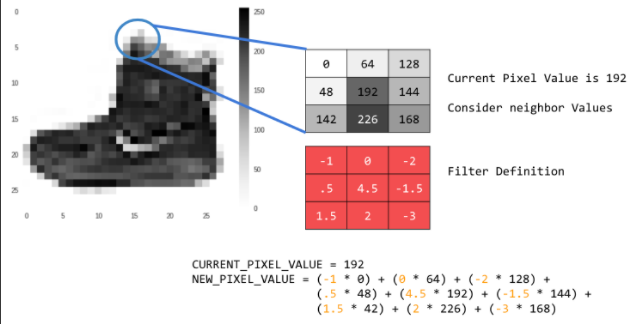

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

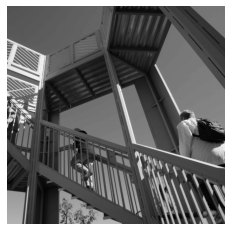

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

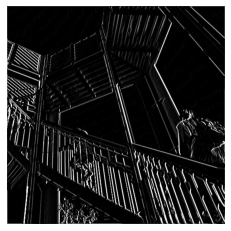

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()   

In [ ]:
# Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:
# Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

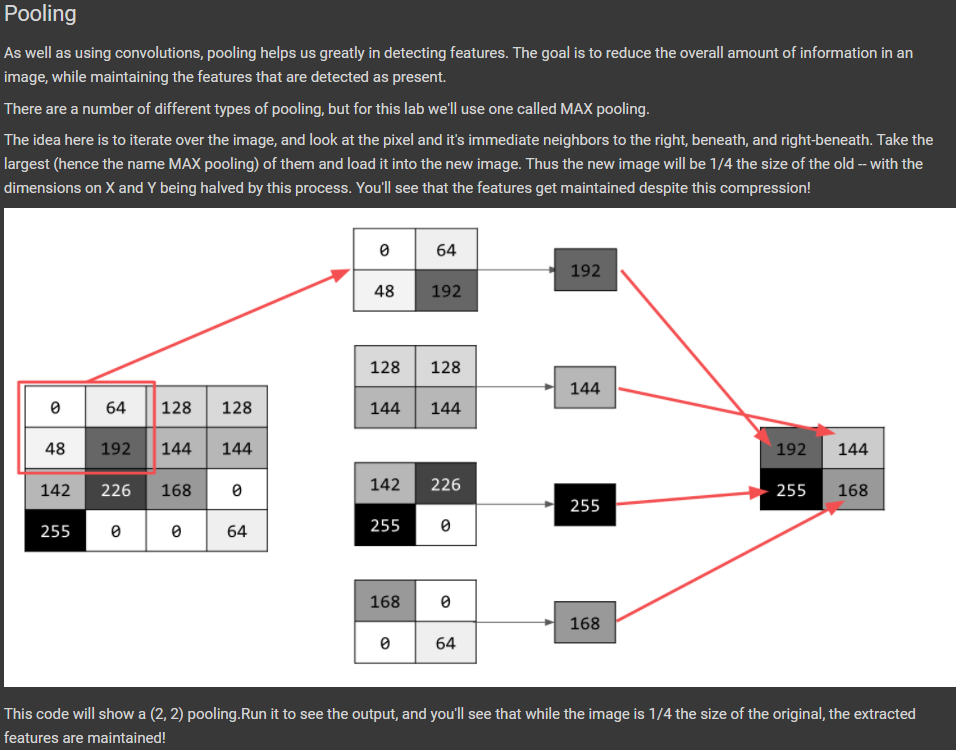

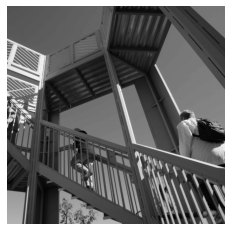

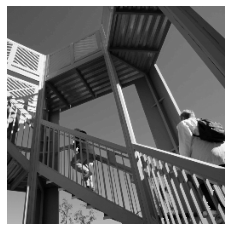

In [ ]:
plt.imshow(i)
plt.axis('off')
plt.grid(False)
plt.show()

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i[x, y])
    pixels.append(i[x+1, y])
    pixels.append(i[x, y+1])
    pixels.append(i[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
# plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.axis('off')
plt.show()      

# **Coding with Convolutional Neural Networks**

[ML04](https://bit.ly/tfw-lab4)

[Excersize](https://bit.ly/tfw-lab4exq)